In [1]:
from google.colab import files
uploaded=files.upload()

Saving CocaCola_Sales_Rawdata.xlsx to CocaCola_Sales_Rawdata (4).xlsx


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [3]:
# Read data from Excel file
data = pd.read_excel(r'CocaCola_Sales_Rawdata.xlsx')

In [4]:
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [6]:
data.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [7]:
data.dtypes

Quarter     object
Sales      float64
dtype: object

In [8]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


<Axes: xlabel='Quarter', ylabel='Sales'>

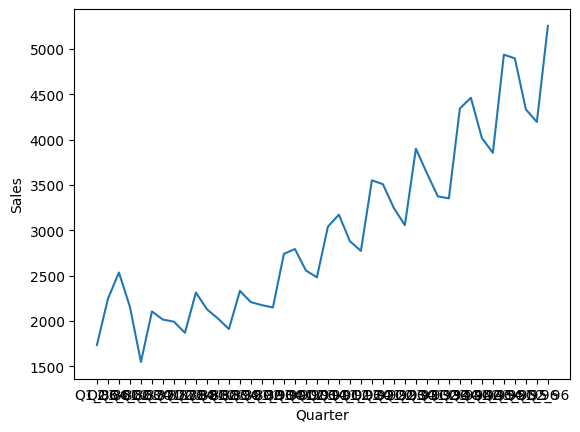

In [9]:
sns.lineplot(x='Quarter', y='Sales', data=data)

<Axes: xlabel='Sales', ylabel='Count'>

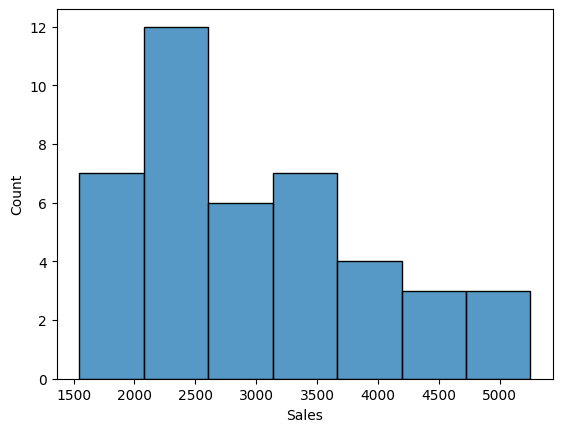

In [10]:
sns.histplot(data=data, x='Sales')


<Axes: >

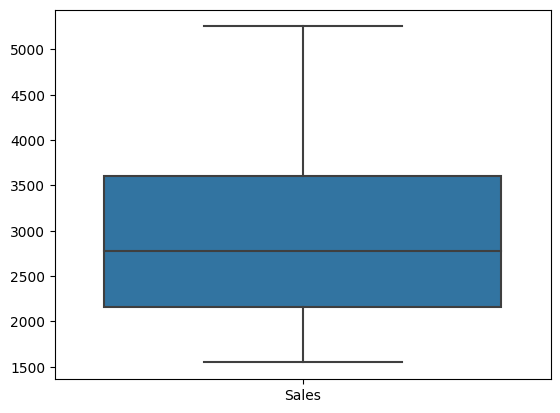

In [11]:
sns.boxplot(data)

In [12]:
# Create dummy variables for the Quarter column
quarter_dummies = pd.get_dummies(data['Quarter'])
data = pd.concat([data, quarter_dummies], axis=1)


In [13]:
# Split the data into training and testing sets
X = data.drop(['Quarter', 'Sales'], axis=1)
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Build and fit the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print('Linear Regression RMSE:', rmse_lr)


Linear Regression RMSE: 917.8241934172775


In [15]:
# Build and fit the decision tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print('Decision Tree RMSE:', rmse_dt)

Decision Tree RMSE: 1268.5274134200163


In [16]:
# Build and fit the random forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print('Random Forest RMSE:', rmse_rf)


Random Forest RMSE: 1240.0760722283896


In [17]:
newdata = data

In [18]:
# Split the 'Quarter' column into quarters and years
quarters = newdata['Quarter'].str.split('_', expand=True)
quarters.columns = ['Quarter', 'Year']

In [19]:
# Map the quarter values to month values
quarters['Month'] = quarters['Quarter'].map({'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'})


In [20]:
# Create a new 'Date' column by combining 'Year', 'Month', and a default day value
quarters['Date'] = quarters['Year'] + '-' + quarters['Month'] + '-01'

# Convert 'Date' column to datetime format
quarters['Date'] = pd.to_datetime(quarters['Date'])

# Add the 'Date' column to the newdata DataFrame
newdata['Date'] = quarters['Date']

In [21]:
newdata.head()


,Quarter,Sales,Q1_86,Q1_87,Q1_88,Q1_89,Q1_90,Q1_91,Q1_92,Q1_93,...,Q4_87,Q4_88,Q4_89,Q4_90,Q4_91,Q4_92,Q4_93,Q4_94,Q4_95,Date
0,Q1_86,1734.827000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1986-01-01
1,Q2_86,2244.960999,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1986-04-01
2,Q3_86,2533.804993,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1986-07-01
3,Q4_86,2154.962997,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1986-10-01
4,Q1_87,1547.818996,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1987-01-01


In [22]:
newdata['Date'].min(), newdata['Date'].max()

(Timestamp('1986-01-01 00:00:00'), Timestamp('1996-04-01 00:00:00'))

In [23]:
newdata=newdata[['Date','Sales']]
newdata.shape

(42, 2)

In [24]:
newdata = newdata.sort_values('Date',ascending=True)
newdata.isnull().sum()

Date     0
Sales    0
dtype: int64

In [25]:
newdata.head(10)

,Date,Sales
0,1986-01-01,1734.827000
1,1986-04-01,2244.960999
2,1986-07-01,2533.804993
3,1986-10-01,2154.962997
4,1987-01-01,1547.818996
5,1987-04-01,2104.411995
6,1987-07-01,2014.362999
7,1987-10-01,1991.746998
8,1988-01-01,1869.049999
9,1988-04-01,2313.631996


In [26]:
newdata = newdata.set_index('Date')

In [27]:
newdata.head()

,Sales
Date,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996


<Axes: xlabel='Date'>

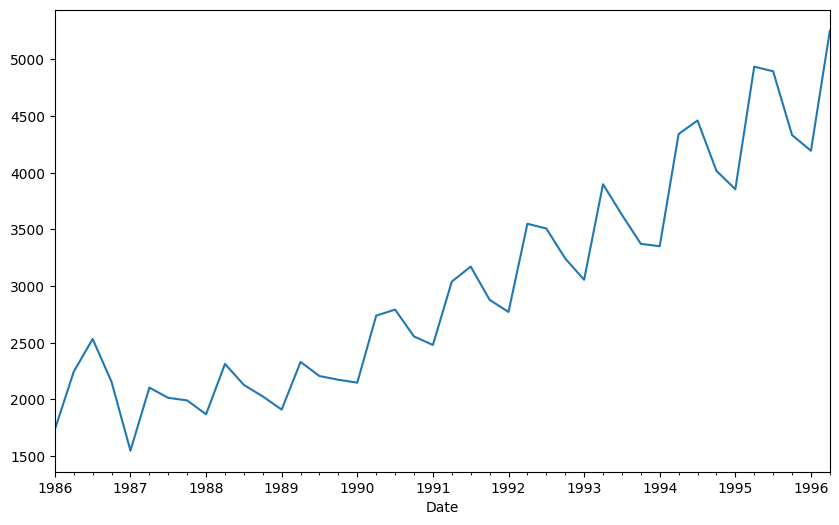

In [28]:
y = newdata['Sales']
y.plot(figsize=(10,6))

In [29]:
train=y.loc[:'1992-01-01']
print(train.shape)
train

(25,)


Date
1986-01-01    1734.827000
1986-04-01    2244.960999
1986-07-01    2533.804993
1986-10-01    2154.962997
1987-01-01    1547.818996
1987-04-01    2104.411995
1987-07-01    2014.362999
1987-10-01    1991.746998
1988-01-01    1869.049999
1988-04-01    2313.631996
1988-07-01    2128.320000
1988-10-01    2026.828999
1989-01-01    1910.603996
1989-04-01    2331.164993
1989-07-01    2206.549995
1989-10-01    2173.967995
1990-01-01    2148.278000
1990-04-01    2739.307999
1990-07-01    2792.753998
1990-10-01    2556.009995
1991-01-01    2480.973999
1991-04-01    3039.522995
1991-07-01    3172.115997
1991-10-01    2879.000999
1992-01-01    2772.000000
Name: Sales, dtype: float64

In [30]:
test = y.loc['1992-01-01':]
print(test.shape)
test

(18,)


Date
1992-01-01    2772.000000
1992-04-01    3550.000000
1992-07-01    3508.000000
1992-10-01    3243.859993
1993-01-01    3056.000000
1993-04-01    3899.000000
1993-07-01    3629.000000
1993-10-01    3373.000000
1994-01-01    3352.000000
1994-04-01    4342.000000
1994-07-01    4461.000000
1994-10-01    4017.000000
1995-01-01    3854.000000
1995-04-01    4936.000000
1995-07-01    4895.000000
1995-10-01    4333.000000
1996-01-01    4194.000000
1996-04-01    5253.000000
Name: Sales, dtype: float64

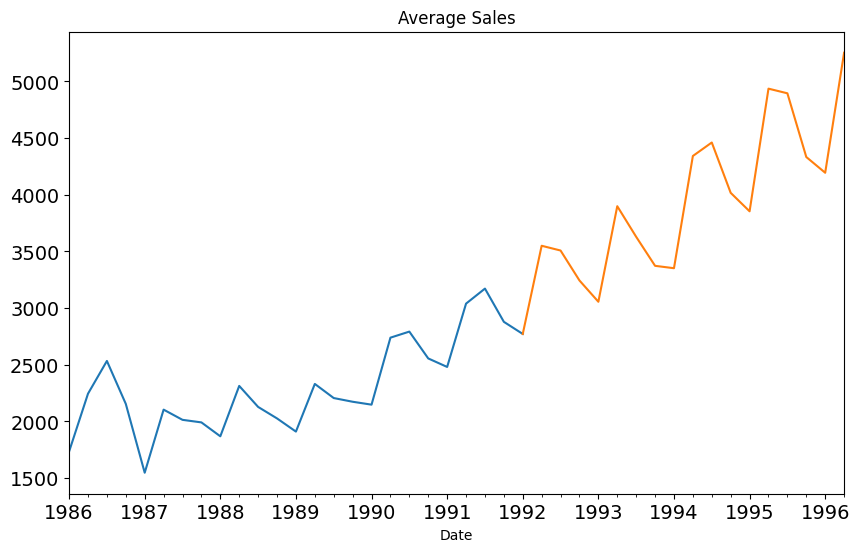

In [31]:
#plotting data
train.plot(figsize=(10,6),title='Average Sales',fontsize=14)
test.plot(figsize=(10,6),title='Average Sales',fontsize=14)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


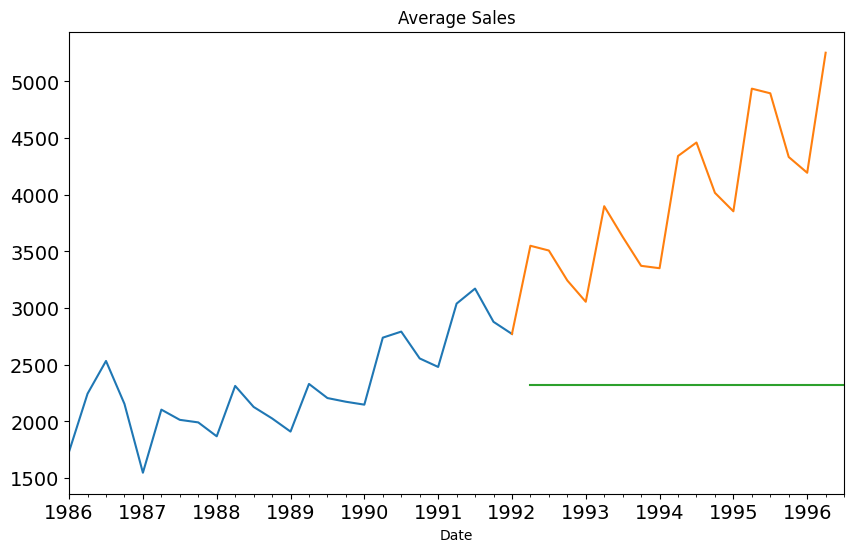

In [32]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.01)
Exp_Smooth['SES'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [33]:
Exp_Smooth.SES

1992-04-01    2317.700342
1992-07-01    2317.700342
1992-10-01    2317.700342
1993-01-01    2317.700342
1993-04-01    2317.700342
1993-07-01    2317.700342
1993-10-01    2317.700342
1994-01-01    2317.700342
1994-04-01    2317.700342
1994-07-01    2317.700342
1994-10-01    2317.700342
1995-01-01    2317.700342
1995-04-01    2317.700342
1995-07-01    2317.700342
1995-10-01    2317.700342
1996-01-01    2317.700342
1996-04-01    2317.700342
1996-07-01    2317.700342
Freq: QS-OCT, dtype: float64

In [34]:
fit1.aic

304.1219987066588

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
<ipython-input-35-5b507763a150>:7: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train).fit(smoothing_level=0.01,smoothing_slope = 0.25)


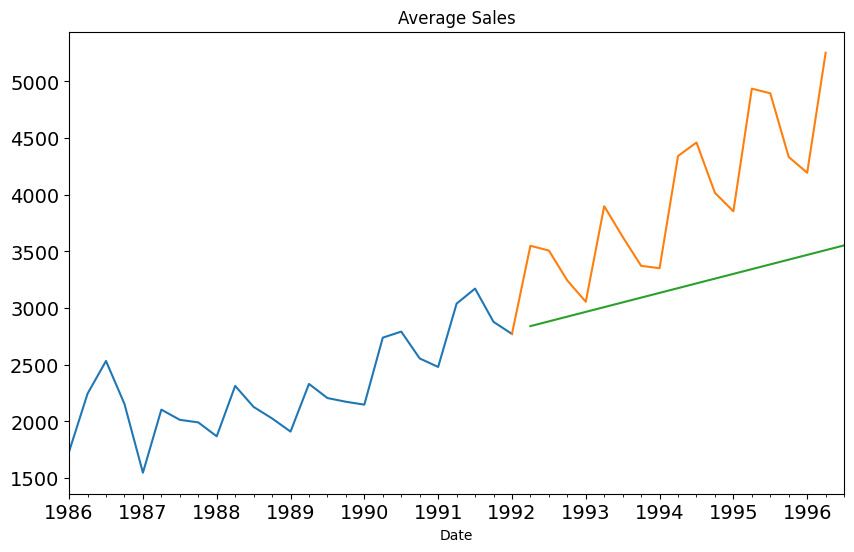

In [35]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()
#smoothing level=beta
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = Holt(train).fit(smoothing_level=0.01,smoothing_slope = 0.25)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [36]:

fit1.aic

288.85168732400314

In [37]:
Holt_df['Holt_linear']

1992-04-01    2841.033410
1992-07-01    2882.930742
1992-10-01    2924.828073
1993-01-01    2966.725405
1993-04-01    3008.622736
1993-07-01    3050.520068
1993-10-01    3092.417400
1994-01-01    3134.314731
1994-04-01    3176.212063
1994-07-01    3218.109394
1994-10-01    3260.006726
1995-01-01    3301.904057
1995-04-01    3343.801389
1995-07-01    3385.698721
1995-10-01    3427.596052
1996-01-01    3469.493384
1996-04-01    3511.390715
1996-07-01    3553.288047
Freq: QS-OCT, dtype: float64

In [38]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,Holt_df['Holt_linear']))
print(rmse)

885.0330763437299


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


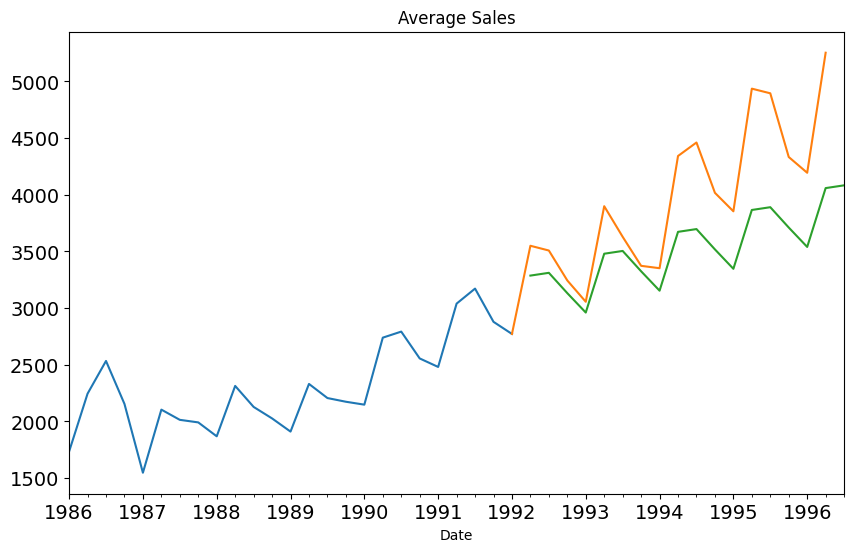

In [39]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#smoothing level=gama
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = ExponentialSmoothing(train , seasonal_periods=4,
                           trend='add',
                           seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [40]:
Holt_Winter_df['Holt_Winter']

1992-04-01    3286.853745
1992-07-01    3311.289970
1992-10-01    3131.938041
1993-01-01    2960.789689
1993-04-01    3479.817971
1993-07-01    3504.254195
1993-10-01    3324.902267
1994-01-01    3153.753915
1994-04-01    3672.782197
1994-07-01    3697.218421
1994-10-01    3517.866493
1995-01-01    3346.718141
1995-04-01    3865.746423
1995-07-01    3890.182647
1995-10-01    3710.830718
1996-01-01    3539.682366
1996-04-01    4058.710649
1996-07-01    4083.146873
Freq: QS-OCT, dtype: float64

In [41]:
fit1.aic

265.9711878642871

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,Holt_Winter_df['Holt_Winter']))
print(rmse)

640.71846632597


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


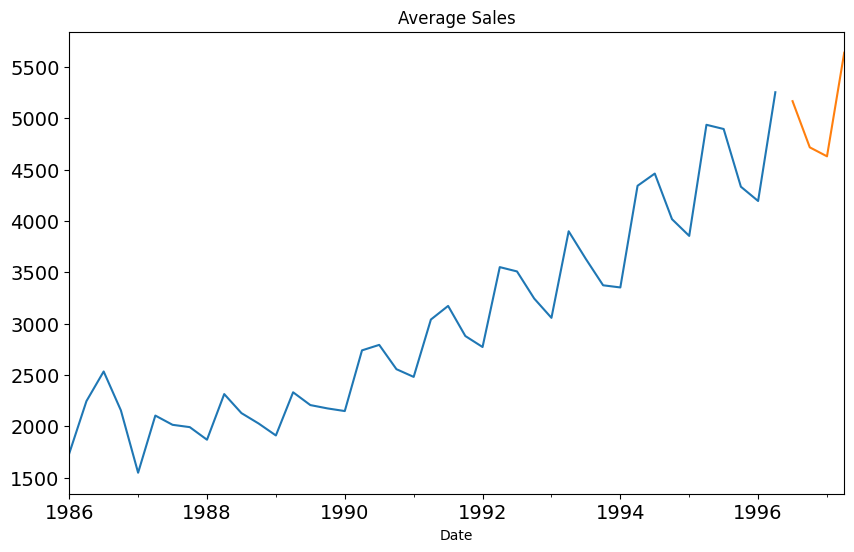

In [43]:
from statsmodels.tsa.api import ExponentialSmoothing

#seasonalperiods = gamma
fit1 = ExponentialSmoothing(y , seasonal_periods=4,
                           trend='add',
                           seasonal='add').fit()


Y_predictions = fit1.forecast(steps=4)

y.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Y_predictions.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [44]:
Y_predictions

1996-07-01    5166.107747
1996-10-01    4716.333016
1997-01-01    4628.864808
1997-04-01    5637.814017
Freq: QS-OCT, dtype: float64

In [45]:
!apt-get install

Reading package lists... Done
Building dependency tree       
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [46]:
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
Y_predictions.to_excel("TimeSeriesOutput.xlsx",index=True)


In [48]:
output = pd.read_excel(r'TimeSeriesOutput.xlsx')

In [49]:
output.head()

,Unnamed: 0,0
0,1996-07-01,5166.107747
1,1996-10-01,4716.333016
2,1997-01-01,4628.864808
3,1997-04-01,5637.814017


In [50]:
fit1.aic

450.5732731477663

In [51]:
Y_predictions

1996-07-01    5166.107747
1996-10-01    4716.333016
1997-01-01    4628.864808
1997-04-01    5637.814017
Freq: QS-OCT, dtype: float64

In [52]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [54]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
!pip install pmdarima


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
import pmdarima as pm


In [58]:
model = pm.auto_arima(y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=631.417, Time=0.03 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=598.141, Time=0.11 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=inf, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=630.930, Time=0.02 sec
 ARIMA(1,2,0)(2,0,0)[12]             : AIC=600.118, Time=0.52 sec
 ARIMA(1,2,0)(1,0,1)[12]             : AIC=600.105, Time=0.53 sec
 ARIMA(1,2,0)(0,0,1)[12]             : AIC=inf, Time=0.38 sec
 ARIMA(1,2,0)(2,0,1)[12]             : AIC=inf, Time=1.81 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=599.837, Time=0.06 sec
 ARIMA(2,2,0)(1,0,0)[12]             : AIC=590.277, Time=0.18 sec
 ARIMA(2,2,0)(0,0,0)[12]             : AIC=620.821, Time=0.03 sec
 ARIMA(2,2,0)(2,0,0)[12]             : AIC=inf, Time=0.30 sec
 ARIMA(2,2,0)(1,0,1)[12]             : AIC=589.685, Time=0.23 sec
 ARIMA(2,2,0)(0,0,1)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(2,2,0)(2,0,1)[12]             : AIC=inf, Time=

In [59]:
model.aic()

544.9727773555996

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


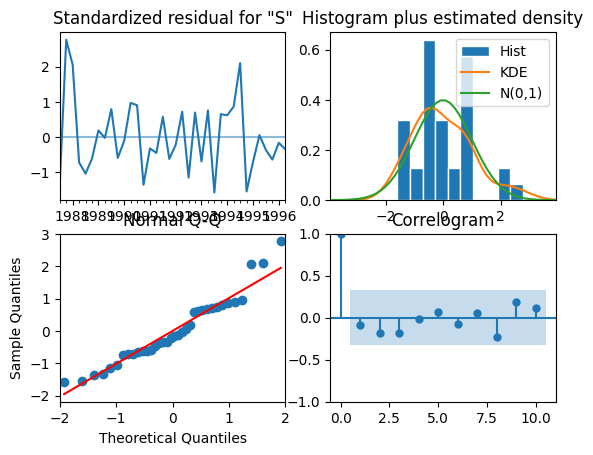

In [60]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt


# Fit the SARIMAX model
model = SARIMAX(newdata, order=(3, 2, 0), seasonal_order=(1, 1, 0, 4))
model_fit = model.fit()

# Plot the diagnostics of the model
model_fit.plot_diagnostics()
plt.show()


In [61]:
#pred = model.get_prediction(start=pd.to_datetime('2017-01-31'))
# Fit the SARIMAX model with the specified order and seasonal_order
model = SARIMAX(train, order=(3, 2, 0), seasonal_order=(1, 1, 0, 4))
model_fit = model.fit()

# Forecast future values
forecast = model_fit.get_prediction(start=pd.to_datetime('1992-01-01'), end=pd.to_datetime('1992-04-01'))

# Get the predicted mean values
forecast_mean = forecast.predicted_mean


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [62]:
print(forecast_mean)

1992-01-01    2773.107103
1992-04-01    3436.072278
Freq: QS-OCT, Name: predicted_mean, dtype: float64


In [63]:
Y_predictions

1996-07-01    5166.107747
1996-10-01    4716.333016
1997-01-01    4628.864808
1997-04-01    5637.814017
Freq: QS-OCT, dtype: float64